In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install prophet

In [ ]:
import glob
import os
import pandas as pd

# Path to the folder containing all JSON files
folder_path = '/content/drive/My Drive/restaurant_data/'

# Get a list of all JSON files in the folder
json_files = glob.glob(folder_path + '*.json')

# Create an empty DataFrame to store the final results
final_result = pd.DataFrame()

for file_path in json_files:
    file_name = os.path.basename(file_path)
    print(f"Processing file: {file_name}")


Processing file: r71ee64.json
Processing file: rec62b3.json
Processing file: rfa1ab3.json
Processing file: r4ea226.json
Processing file: r3d1075.json
Processing file: r9b4973.json
Processing file: r9c6dd9.json
Processing file: r86f453.json
Processing file: re55f26.json
Processing file: rc58e97.json
Processing file: rbe4009.json
Processing file: re0fcc4.json
Processing file: reb5930.json
Processing file: rc0b601.json
Processing file: rc35c11.json
Processing file: re923de.json
Processing file: r91c411.json
Processing file: rd1187b.json
Processing file: r8973fe.json
Processing file: rda94f6.json
Processing file: r8a2e4a.json
Processing file: r5028cc.json
Processing file: rcf444b.json
Processing file: rde2f7e.json
Processing file: r4c8016.json
Processing file: r9ae7da.json
Processing file: rf767b1.json
Processing file: rfec07f.json
Processing file: r8f4a63.json
Processing file: refff54.json
Processing file: r5e9540.json
Processing file: r821d0c.json
Processing file: r3c8001.json
Processing

#整合

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from prophet import Prophet
import matplotlib.pyplot as plt

## 全部跑完 （先跳過）


In [ ]:
for i, file_path in enumerate(json_files[:5]):
    # Load data
    df = pd.read_json(file_path)

    # Need to prepare a DataFrame 'df' with columns 'ds' (datetime) and 'y' (revenue)

    # Extract restaurant name from the file_path
    restaurant_name = os.path.basename(file_path).split('.')[0]

    # Convert 'invoice_unix_timestamp'(counted in seconds) to datetime format
    df['ds'] = pd.to_datetime(df['invoice_unix_timestamp'], unit='s')

    # Assuming revenue is the sum of 'invoice_total_amount' and 'invoice_discount_amount'
    df['y'] = df['invoice_total_amount'].astype(float) - df['invoice_discount_amount'].astype(float)

    # Create a new DataFrame with only 'ds' and 'y' columns
    df = df[['ds', 'y']]

    # Split the data into training and testing sets
    train_size = int(len(df) * 0.8)  # 80% training, 20% testing
    train_data, test_data = df[:train_size], df[train_size:]

    # Define the model
    model = Prophet(
        seasonality_prior_scale=0.01,
        changepoint_prior_scale=0.1,
        # n_changepoints=25
    )

    # Add Taiwanese holidays
    model.add_country_holidays(country_name='TW')

    # Fit the model with training data
    model.fit(train_data)

    hourly_date_range = pd.date_range(start='2023-10-07', end='2023-10-13', freq='H')
    future_hourly = pd.DataFrame({'ds': hourly_date_range})

    # Use the model to make an hourly forecast
    forecast_hourly = model.predict(future_hourly)

    result = []
    # for date in forecast_hourly['ds'].dt.date.unique():
    #     daily_data = forecast_hourly[forecast_hourly['ds'].dt.date == date]
    #     hourly_differences = daily_data['yhat'].diff().fillna(0)  # Calculate differences between consecutive hours
    #     max_interval_end = daily_data.loc[hourly_differences.idxmax(), 'ds']

    #     # Subtract an hour to get the start of the peak interval
    #     max_interval_start = max_interval_end - pd.DateOffset(hours=1)

    #     result.append({'Date': date, 'Peak Interval Start': max_interval_start.strftime('%H:%M'),
    #                   'Peak Interval End': max_interval_end.strftime('%H:%M')})

    for date in forecast_hourly['ds'].dt.date.unique():
      daily_data = forecast_hourly[forecast_hourly['ds'].dt.date == date]

      # Find the hour with the maximum revenue
      max_revenue_hour = daily_data.loc[daily_data['yhat'].idxmax(), 'ds']

      # Subtract an hour to get the start of the peak interval
      max_interval_start = max_revenue_hour - pd.DateOffset(hours=1)

      result.append({'Date': date, 'Peak Interval Start': max_interval_start.strftime('%H:%M'),
                    'Peak Interval End': max_revenue_hour.strftime('%H:%M')})


    # Convert the result to a DataFrame
    result_df = pd.DataFrame(result)
    result_df['restaurant_name'] = restaurant_name
    print(result_df)

    # Append the result to the final_result DataFrame
    final_result = pd.concat([final_result, result_df], ignore_index=True)

final_result.to_csv('/content/drive/My Drive/restaurant_data/predicted_results_1~5.csv', index=False)
print(final_result)

DEBUG:cmdstanpy:input tempfile: /tmp/tmphb9jblk1/ljr3wbs4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphb9jblk1/tdpd4nwu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67645', 'data', 'file=/tmp/tmphb9jblk1/ljr3wbs4.json', 'init=/tmp/tmphb9jblk1/tdpd4nwu.json', 'output', 'file=/tmp/tmphb9jblk1/prophet_modelmsqi82xp/prophet_model-20231209071959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


         Date Peak Interval Start Peak Interval End restaurant_name
0  2023-10-07               09:00             10:00         r71ee64
1  2023-10-08               09:00             10:00         r71ee64
2  2023-10-09               09:00             10:00         r71ee64
3  2023-10-10               09:00             10:00         r71ee64
4  2023-10-11               09:00             10:00         r71ee64
5  2023-10-12               09:00             10:00         r71ee64
6  2023-10-13               23:00             00:00         r71ee64


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphb9jblk1/i63jca12.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphb9jblk1/j7lo8mkc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66879', 'data', 'file=/tmp/tmphb9jblk1/i63jca12.json', 'init=/tmp/tmphb9jblk1/j7lo8mkc.json', 'output', 'file=/tmp/tmphb9jblk1/prophet_modelkfvh2csq/prophet_model-20231209072016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


         Date Peak Interval Start Peak Interval End restaurant_name
0  2023-10-07               08:00             09:00         rec62b3
1  2023-10-08               08:00             09:00         rec62b3
2  2023-10-09               08:00             09:00         rec62b3
3  2023-10-10               08:00             09:00         rec62b3
4  2023-10-11               08:00             09:00         rec62b3
5  2023-10-12               08:00             09:00         rec62b3
6  2023-10-13               23:00             00:00         rec62b3


DEBUG:cmdstanpy:input tempfile: /tmp/tmphb9jblk1/4gfdrnh3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphb9jblk1/b2l3iy3d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4532', 'data', 'file=/tmp/tmphb9jblk1/4gfdrnh3.json', 'init=/tmp/tmphb9jblk1/b2l3iy3d.json', 'output', 'file=/tmp/tmphb9jblk1/prophet_model66agd4dk/prophet_model-20231209072031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


         Date Peak Interval Start Peak Interval End restaurant_name
0  2023-10-07               10:00             11:00         rfa1ab3
1  2023-10-08               10:00             11:00         rfa1ab3
2  2023-10-09               10:00             11:00         rfa1ab3
3  2023-10-10               10:00             11:00         rfa1ab3
4  2023-10-11               10:00             11:00         rfa1ab3
5  2023-10-12               10:00             11:00         rfa1ab3
6  2023-10-13               23:00             00:00         rfa1ab3


DEBUG:cmdstanpy:input tempfile: /tmp/tmphb9jblk1/7s4qkjk4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphb9jblk1/int1fr0j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65061', 'data', 'file=/tmp/tmphb9jblk1/7s4qkjk4.json', 'init=/tmp/tmphb9jblk1/int1fr0j.json', 'output', 'file=/tmp/tmphb9jblk1/prophet_modelodnwo2zs/prophet_model-20231209072113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


         Date Peak Interval Start Peak Interval End restaurant_name
0  2023-10-07               12:00             13:00         r4ea226
1  2023-10-08               02:00             03:00         r4ea226
2  2023-10-09               02:00             03:00         r4ea226
3  2023-10-10               02:00             03:00         r4ea226
4  2023-10-11               02:00             03:00         r4ea226
5  2023-10-12               02:00             03:00         r4ea226
6  2023-10-13               23:00             00:00         r4ea226


DEBUG:cmdstanpy:input tempfile: /tmp/tmphb9jblk1/0s36s4qj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphb9jblk1/j7u82z2t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92160', 'data', 'file=/tmp/tmphb9jblk1/0s36s4qj.json', 'init=/tmp/tmphb9jblk1/j7u82z2t.json', 'output', 'file=/tmp/tmphb9jblk1/prophet_modelhekc06jl/prophet_model-20231209072212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


         Date Peak Interval Start Peak Interval End restaurant_name
0  2023-10-07               17:00             18:00         r3d1075
1  2023-10-08               17:00             18:00         r3d1075
2  2023-10-09               17:00             18:00         r3d1075
3  2023-10-10               17:00             18:00         r3d1075
4  2023-10-11               17:00             18:00         r3d1075
5  2023-10-12               17:00             18:00         r3d1075
6  2023-10-13               23:00             00:00         r3d1075
          Date Peak Interval Start Peak Interval End restaurant_name
0   2023-10-07               09:00             10:00         r71ee64
1   2023-10-08               09:00             10:00         r71ee64
2   2023-10-09               09:00             10:00         r71ee64
3   2023-10-10               09:00             10:00         r71ee64
4   2023-10-11               09:00             10:00         r71ee64
5   2023-10-12               09:00        

##建立模型

In [ ]:
for i, file_path in enumerate(json_files[:5]):
    # Load data
    df = pd.read_json(file_path)

    # Need to prepare a DataFrame 'df' with columns 'ds' (datetime) and 'y' (revenue)

    # Extract restaurant name from the file_path
    restaurant_name = os.path.basename(file_path).split('.')[0]

    # Convert 'invoice_unix_timestamp'(counted in seconds) to datetime format
    df['ds'] = pd.to_datetime(df['invoice_unix_timestamp'], unit='s')

    # Assuming revenue is the sum of 'invoice_total_amount' and 'invoice_discount_amount'
    df['y'] = df['invoice_total_amount'].astype(float) - df['invoice_discount_amount'].astype(float)

    # Create a new DataFrame with only 'ds' and 'y' columns
    df = df[['ds', 'y']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from prophet import Prophet
import matplotlib.pyplot as plt

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)  # 80% training, 20% testing
train_data, test_data = df[:train_size], df[train_size:]

In [ ]:
# Define the model
model = Prophet(
    seasonality_prior_scale=0.01,
    changepoint_prior_scale=0.1,
    # n_changepoints=25
)

# Add Taiwanese holidays
model.add_country_holidays(country_name='TW')

# Fit the model with training data
model.fit(train_data)

# Make predictions on the testing set
forecast = model.predict(test_data)

# Extract the relevant information (date, predicted revenue, and actual revenue) from the forecast and test_data
result = forecast[['ds', 'yhat']].merge(test_data, on='ds')

# Rename columns for clarity
result.columns = ['ds', 'predicted_revenue', 'actual_revenue']

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(result['actual_revenue'], result['predicted_revenue'])
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate the average revenue in the predicted values
average_predicted_revenue = result['predicted_revenue'].mean()
print(f'Average Predicted Revenue: {average_predicted_revenue}')

# Check if MAE is a small percentage of the average predicted revenue
mae_percentage = (mae / average_predicted_revenue) * 100
print(f'MAE as a Percentage of Average Predicted Revenue: {mae_percentage:.2f}%')

# Assess the performance based on MAE
if mae_percentage < 10:
    print('The model performance is good.')
else:
    print('The model performance may need improvement. Consider further analysis and tuning.')

DEBUG:cmdstanpy:input tempfile: /tmp/tmphb9jblk1/2i348u2b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphb9jblk1/dgb6agkr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38876', 'data', 'file=/tmp/tmphb9jblk1/2i348u2b.json', 'init=/tmp/tmphb9jblk1/dgb6agkr.json', 'output', 'file=/tmp/tmphb9jblk1/prophet_modelu6czlmnk/prophet_model-20231209071050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error (MAE): 86.22011698372171
Average Predicted Revenue: 184.21243068343114
MAE as a Percentage of Average Predicted Revenue: 46.80%
The model performance may need improvement. Consider further analysis and tuning.


##預測

In [ ]:
    hourly_date_range = pd.date_range(start='2023-10-07', end='2023-10-13', freq='H')
    future_hourly = pd.DataFrame({'ds': hourly_date_range})

    # Use the model to make an hourly forecast
    forecast_hourly = model.predict(future_hourly)

    result = []
    # for date in forecast_hourly['ds'].dt.date.unique():
    #     daily_data = forecast_hourly[forecast_hourly['ds'].dt.date == date]
    #     hourly_differences = daily_data['yhat'].diff().fillna(0)  # Calculate differences between consecutive hours
    #     max_interval_end = daily_data.loc[hourly_differences.idxmax(), 'ds']

    #     # Subtract an hour to get the start of the peak interval
    #     max_interval_start = max_interval_end - pd.DateOffset(hours=1)

    #     result.append({'Date': date, 'Peak Interval Start': max_interval_start.strftime('%H:%M'),
    #                   'Peak Interval End': max_interval_end.strftime('%H:%M')})

    for date in forecast_hourly['ds'].dt.date.unique():
      daily_data = forecast_hourly[forecast_hourly['ds'].dt.date == date]

      # Find the hour with the maximum revenue
      max_revenue_hour = daily_data.loc[daily_data['yhat'].idxmax(), 'ds']

      # Subtract an hour to get the start of the peak interval
      max_interval_start = max_revenue_hour - pd.DateOffset(hours=1)

      result.append({'Date': date, 'Peak Interval Start': max_interval_start.strftime('%H:%M'),
                    'Peak Interval End': max_revenue_hour.strftime('%H:%M')})


    # Convert the result to a DataFrame
    result_df = pd.DataFrame(result)
    result_df['restaurant_name'] = restaurant_name
    print(result_df)

    # Append the result to the final_result DataFrame
    final_result = pd.concat([final_result, result_df], ignore_index=True)

final_result.to_csv('/content/drive/My Drive/restaurant_data/predicted_results_1~5.csv', index=False)
print(final_result)

         Date Peak Interval Start Peak Interval End restaurant_name
0  2023-10-07               17:00             18:00         r3d1075
1  2023-10-08               17:00             18:00         r3d1075
2  2023-10-09               17:00             18:00         r3d1075
3  2023-10-10               17:00             18:00         r3d1075
4  2023-10-11               17:00             18:00         r3d1075
5  2023-10-12               17:00             18:00         r3d1075
6  2023-10-13               23:00             00:00         r3d1075
         Date Peak Interval Start Peak Interval End restaurant_name
0  2023-10-07               17:00             18:00         r3d1075
1  2023-10-08               17:00             18:00         r3d1075
2  2023-10-09               17:00             18:00         r3d1075
3  2023-10-10               17:00             18:00         r3d1075
4  2023-10-11               17:00             18:00         r3d1075
5  2023-10-12               17:00             18

### draw plot

          ds        yhat  yhat_lower  yhat_upper
0 2023-10-07  185.525830    3.131697  376.621982
1 2023-10-08  207.409042   27.122171  396.697541
2 2023-10-09  157.870313  -32.670734  328.313331
3 2023-10-10  144.632862  -22.147588  335.723483
4 2023-10-11  155.412797  -23.437015  340.504385
5 2023-10-12  142.796018  -29.856444  323.253600
6 2023-10-13  148.823662  -32.017943  337.020208


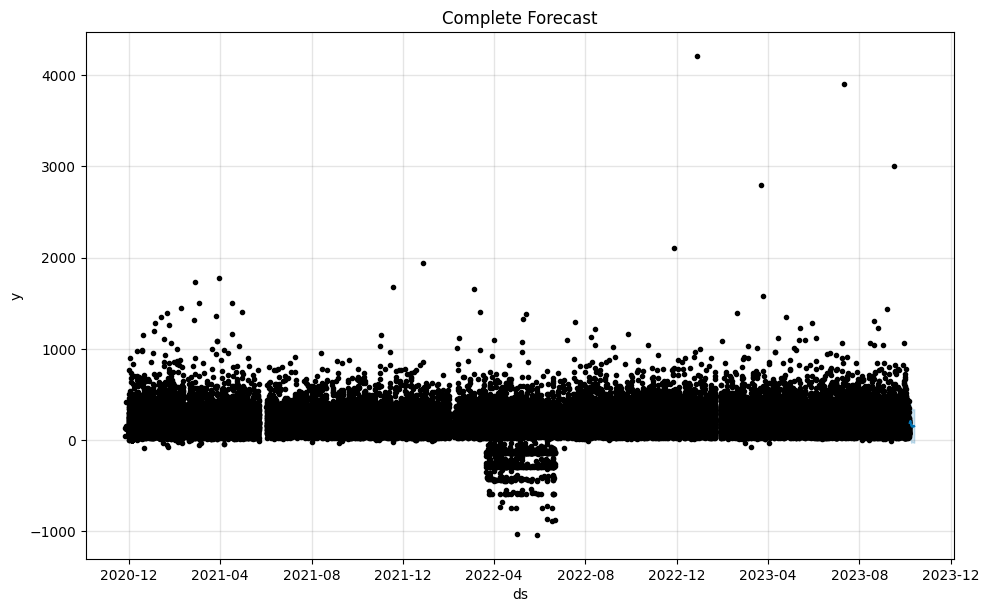

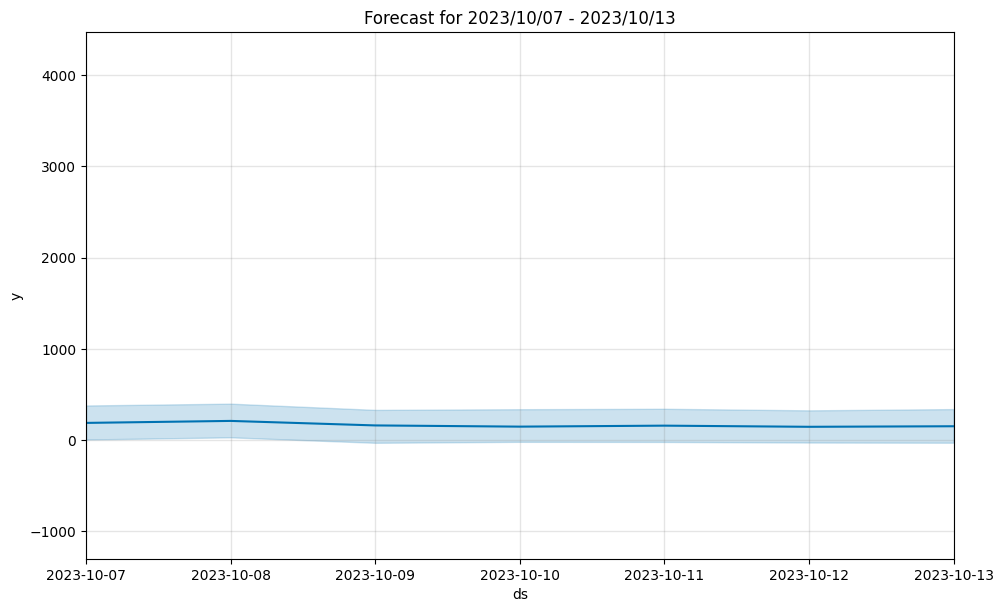

In [ ]:
# Display the forecast for the entire period
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Plot the forecast for the entire period
fig1 = model.plot(forecast)
plt.title('Complete Forecast')
plt.show()

# Plot the forecast for the specific date range
fig2 = model.plot(forecast)
plt.xlim([start_date, end_date])  # Set the x-axis limits to focus on the desired date range
plt.title('Forecast for 2023/10/07 - 2023/10/13')  # Add a title to the plot
plt.show()

## predict結果意義

##Manually Evaluate Forecast Model